# Coleta e Importação

In [62]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
# Importing CSV file
gym = pd.read_csv('/kaggle/input/gym-exercises/stretch_exercise_dataset new.csv')

In [63]:
data_types = gym.dtypes
print(data_types)

Exercise Name        object
Equipment            object
Preparation          object
Execution            object
Target_Muscles       object
Synergist_Muscles    object
Main_muscle          object
dtype: object


In [64]:
duplicates = gym.duplicated().sum()
print(f"duplicate: {duplicates}")

duplicate: 0


# Exploração 

In [65]:
gym.head(5)

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
0,Retraction​​​​​​​,Stretch,Stand or sit.,Pull head back as far possible while looking s...,"Longus colli,","Splenius, Trapezius, Upper, Erector Spinae, Ce...",Neck
1,Neck Extensor,Stretch,Bow head forward with jaw shut. Depress chin i...,Slightly turn head to one side. Hold stretch. ...,"Splenius,","Trapezius, Upper (Part 1), Erector Spinae, Cer...",Neck
2,Doorway,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
3,Wall,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
4,Side Deltoid,Stretch,0,0,"Deltoid, Lateral,","Infraspinatus, Teres Minor, Trapezius, Middle,...",Shoulder


In [66]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Exercise Name      94 non-null     object
 1   Equipment          94 non-null     object
 2   Preparation        94 non-null     object
 3   Execution          94 non-null     object
 4   Target_Muscles     93 non-null     object
 5   Synergist_Muscles  94 non-null     object
 6   Main_muscle        94 non-null     object
dtypes: object(7)
memory usage: 5.3+ KB


In [67]:
gym.describe(include='all')

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
count,94,94,94,94,93,94,94
unique,64,9,84,82,35,31,9
top,Lever,Stretch,0,0,Hamstrings,0,Thighs
freq,7,72,6,6,9,41,27


In [68]:
gym.columns

Index(['Exercise Name', 'Equipment', 'Preparation', 'Execution',
       'Target_Muscles', 'Synergist_Muscles', 'Main_muscle'],
      dtype='object')

In [69]:
gym.shape

(94, 7)

In [70]:
gym.isnull().sum()

Exercise Name        0
Equipment            0
Preparation          0
Execution            0
Target_Muscles       1
Synergist_Muscles    0
Main_muscle          0
dtype: int64

In [71]:
# removendo valores
gym_cleaned = gym.dropna()

gym_cleaned = gym.dropna(axis=1)

# Limpeza

In [72]:
from scipy import stats

numeric_cols = gym.select_dtypes(include=['float64', 'int64'])
z_scores = stats.zscore(numeric_cols)

outliers = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)
gym_outliers = gym[outliers]
print(gym_outliers.shape[0])

0


In [73]:
gym_no_outliers = gym[~outliers]

# Calculando Cluster

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

gym_cleaned_encoded = pd.get_dummies(gym_cleaned)

In [75]:
wcssgym = []
k_values = range(1, 11)

for k in k_values:
    kmeansGym = KMeans(n_clusters=k, random_state=42)
    kmeansGym.fit(gym_cleaned_encoded)
    wcssgym.append(kmeansGym.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

## Gráfico de Cotovelo

In [76]:
for i in range(len(wcssgym)):
  print(f'Cluster {i+1}: Valor do WCSS {wcssgym[i]}')

Cluster 1: Valor do WCSS 464.72340425531905
Cluster 2: Valor do WCSS 430.64403183023876
Cluster 3: Valor do WCSS 403.4562962962962
Cluster 4: Valor do WCSS 383.3583333333334
Cluster 5: Valor do WCSS 366.6826811594203
Cluster 6: Valor do WCSS 353.2271256038648
Cluster 7: Valor do WCSS 341.15333333333336
Cluster 8: Valor do WCSS 337.34011695906435
Cluster 9: Valor do WCSS 325.9460317460317
Cluster 10: Valor do WCSS 316.9358187134503


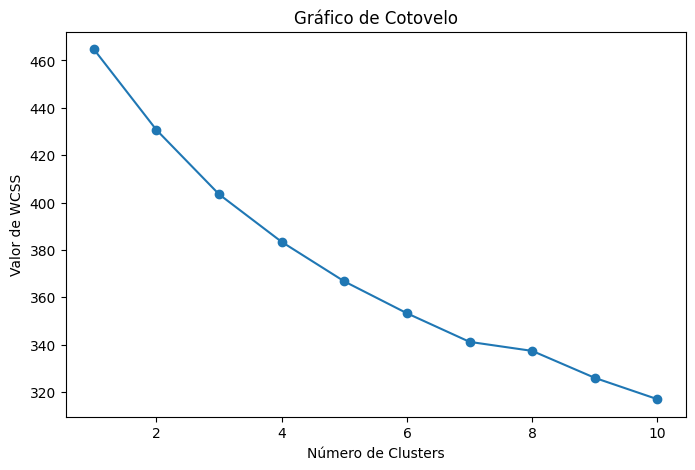

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcssgym, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor de WCSS')
plt.title('Gráfico de Cotovelo')
plt.show()

In [78]:
k_ideal = 7  
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)

kmeans_final.fit(gym_cleaned_encoded)

labels = kmeans_final.labels_

gym_cleaned['Cluster'] = labels
print(gym_cleaned.head())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Exercise Name Equipment  \
0  Retraction​​​​​​​   Stretch   
1      Neck Extensor   Stretch   
2            Doorway   Stretch   
3               Wall   Stretch   
4       Side Deltoid   Stretch   

                                         Preparation  \
0                                      Stand or sit.   
1  Bow head forward with jaw shut. Depress chin i...   
2                                                  0   
3                                                  0   
4                                                  0   

                                           Execution  \
0  Pull head back as far possible while looking s...   
1  Slightly turn head to one side. Hold stretch. ...   
2                                                  0   
3                                                  0   
4                                                  0   

                                   Synergist_Muscles Main_muscle  Cluster  
0  Splenius, Trapezius, Upper, Erector Spinae

## Clusterização

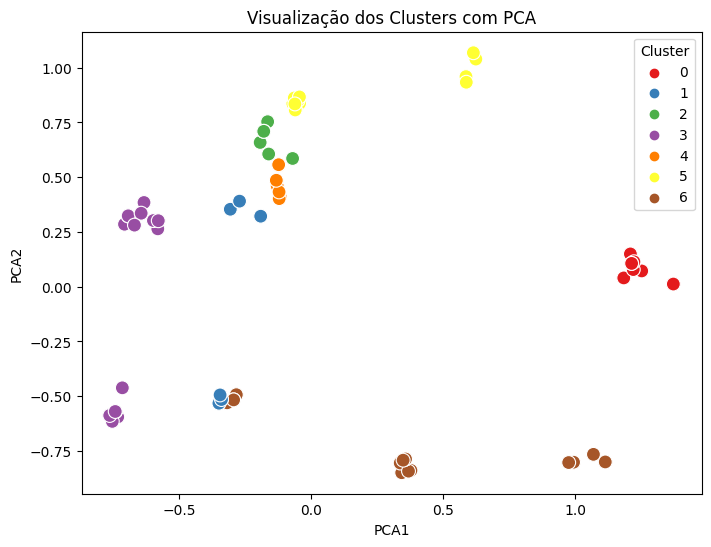

In [79]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
gym_pca = pca.fit_transform(gym_cleaned_encoded)

df_pca = pd.DataFrame(gym_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Visualização dos Clusters com PCA')
plt.show()
# agrupando os exercícios de alongamento - Cada cluster representa um grupo de exercícios semelhantes

# Visualizações

In [84]:
fig = px.bar(gym, x='Equipment', title='Distribuição de Exercicios')
fig.show()

In [83]:
fig = px.box(gym, x='Equipment', y='Exercise Name', title='Box Plot of Exercises by Equipment')
fig.update_xaxes(tickangle=45)
fig.show()